# Introduction

In my last [post](https://thecamilovisk.github.io/posts/Collaborative-Filtering-Recommender-System/) we hade a brief discussion about  Recommender Systems, one of the most widespread application of machine learning technology in industry. In this post we'll talk about Customer Segmentation, another essential machine learning task used by companies to get insights about their clients base, like their needs, which groups should marketing programs be focused on, what preferences these groups have, how to engage new clients and so on.

## Required packages

- Numpy
- Pandas
- Scikit-Learn
- Matplotlib
- Seaborn
- Kaggle API (optional)

## What is Customer Segmentation and why to use it?

Customer Segmentation is the process of dividing customers into groups based on common characteristics. A company might segment customers according to a wide range of factors: age, gender, marital status, purchase history, location (urban, suburban, rural), etc. Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

- Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
- Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
- Identify ways to improve products or new product or service opportunities.
- Establish better customer relationships.
- Test pricing options.
- Focus on the most profitable customers.
- Improve customer cross-sell other products and servicecs.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customer's preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

## Dataset Description

For this project we'll use the [Mall Custumer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python), a dataset created with the sole purpose of learning the concepts of Customer Segmentation using Machine Learning.

The data is composed by the following variables:

- **CustomerID**: Unique ID assigned to the customer
- **Gender**: Gender of the customer
- **Age**: Age of the customer
- **Annual Income (R$)**: Annual Income of the customer
- **Spending score (1-100)**: Score assigned by the mall based on the customer behavior and spending nature.

## Exploratory Data Analysis

Let's begin by downloading our data. Here I'll use the [kaggle API](https://github.com/Kaggle/kaggle-api) package, but you are free to donwload it manually or by other means.

In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")

In [2]:
if not os.path.isfile("Mall_Customers.csv"):
    !kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
    !unzip customer-segmentation-tutorial-in-python.zip
    !rm customer-segmentation-tutorial-in-python.zip

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


As we can see, the data is comprised by 200 entries.

Let's check for missing values

In [5]:
missing_info = customer_data.isna().sum().to_frame()
missing_info.columns = ["NA count"]
missing_info

,NA count
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


We don't have missing data. Good! For such a small dataset, missing values would be a problem.

Let's check some dataset statics

In [6]:
print("Numeric variables:")
display(customer_data.describe().T)
print("-" * 87)
print("Nominal variables:")
display(customer_data.describe(include="O").T)

Numeric variables:


,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


---------------------------------------------------------------------------------------
Nominal variables:


,count,unique,top,freq
Gender,200,2,Female,112


 As we can see, **Gender** is a nominal variable, while **Age**, **Annual Income (k\\$)** and **Spending Score (1-100)** are numeric continuous variables. We can also note that **Gender** is also a binary variable.

### Gender Distribution

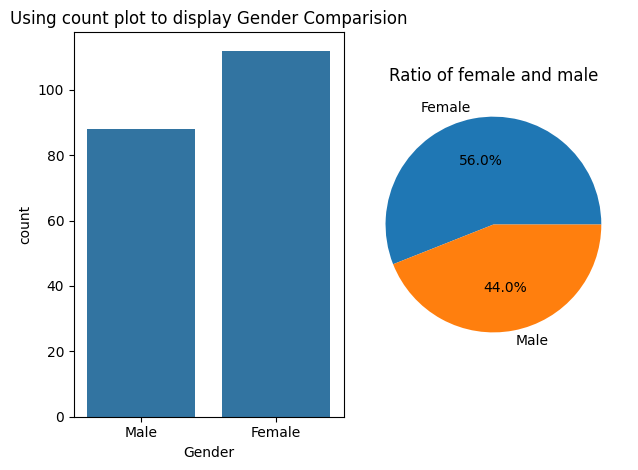

In [7]:
_, (ax1, ax2) = plt.subplots(ncols=2)

sns.countplot(x="Gender", data=customer_data, ax=ax1)
ax1.set_title("Using count plot to display Gender Comparision")

customer_data.groupby("Gender").size().plot.pie(autopct="%.1f%%", ax=ax2)
ax2.set_title("Ratio of female and male")
ax2.set_ylabel("");

plt.tight_layout()

As said before, the "Gender" variable is a **binary** variable, and it's value can be either **Male** of **Female**. One can also note that there are sightly more **Female** entries than **Male**.

### Distribution plots

The following variables are of continuous type, and we'll basically describe then using their histogram, density estimation functions and [violin plots](https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/). We'll create a function that encapsulates the creation of those plots.

In [8]:
def distribution_plots(data, column, bins, color=None):
    _, (ax1, ax2) = plt.subplots(nrows=2)
    
    # Seaborn's histplot can combine a histogram and a density estimation function
    # in one single plot.
    sns.histplot(x=column, data=data, kde=True, bins=bins, color=color, ax=ax1)
    ax1.set_title(f"Distribution of {column} feature")
    
    sns.violinplot(x=column, data=data, color=color, ax=ax2)
    ax2.set_title(f"Boxplot for Descriptive Analysis of {column} feature")
    
    plt.tight_layout()

### Age Distribution

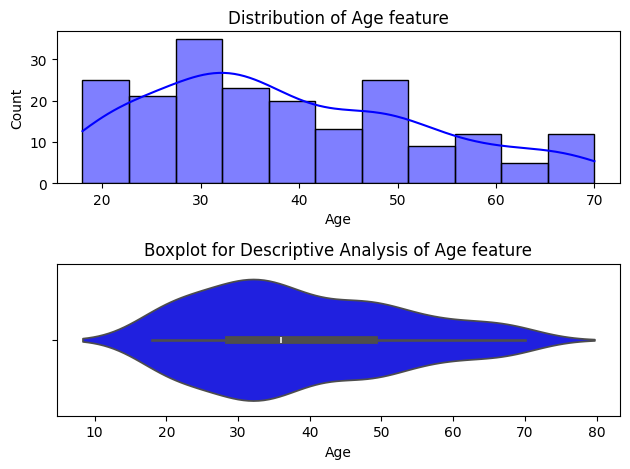

In [9]:
distribution_plots(customer_data, "Age", bins=11, color="blue")

As we can see, 50% of the customers have between 28 and 49 years old, and the age average is about 36 years. The younger customer and the older customer have 18 and 70 years old, respectively.

### Annual Icome of the Customers

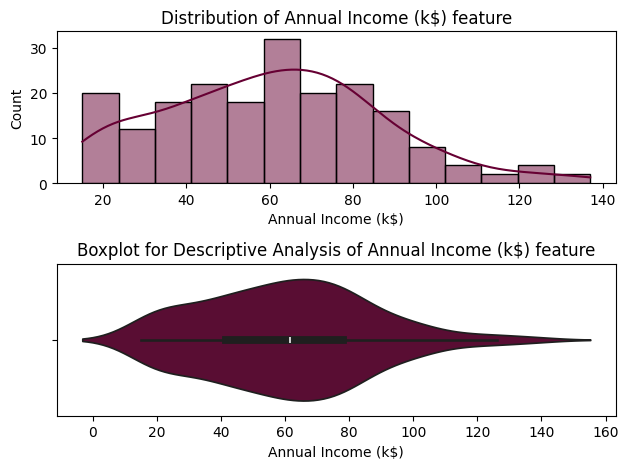

In [10]:
distribution_plots(customer_data, "Annual Income (k$)", bins=14, color="#660033")

From the descriptive analysis above, we can conclude that 50% of the consumers have annual income between 41,5K\\$ and 78K\\$, and the average income is about 61,5k\\$. The minimum user income is of 15 k\\$ and the maximun is of 137 k\\$.

### Spending Score of the Customers

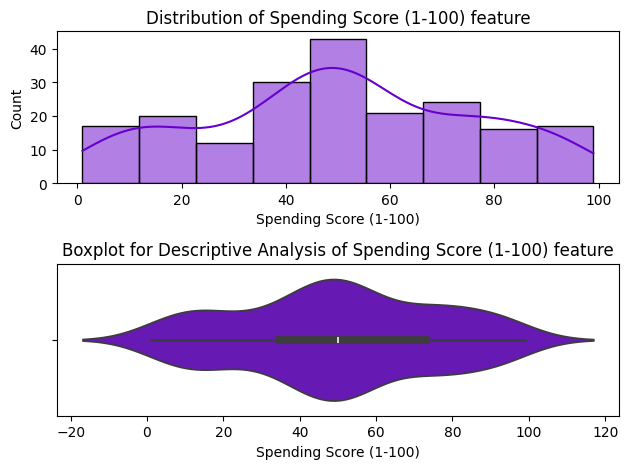

In [11]:
distribution_plots(customer_data, "Spending Score (1-100)", bins=9, color="#6600cc")

50% of the customers have the score between 35 and 73, with the mean score of approximately 50.

## Customer Base Clustering

Gennearally speaking, customer segmentation requires a company to gather specific information/data about customers, analyze it and identify patterns that can be used to create the segments. Typical information-gathering methods include:

- Face-to-face or telephone interviews
- Surveys
- General research using published information about market categories
- Focus groups

The gathered data then is analyzed by marketing specialists with the aid of other professionals, like designers, entreperneurs and, of course, data scientists and machine learning practioneers. In this post we'll ignore all complex segmentation stages of a marketing company and focus on an simple machine learning approach using the **k-means clustering algorithm**.

### K-means Algorithm

The most common k-means clustering algorithm (a.k.a naïve k-means) is a **unsupervised learning** techinique that consists in iterativelly cluster similar data based on the **Euclidian Distance** of each data point, or observations, to its closest cluster centroid. The algorithm aims to minimize the distances between cluster centroids and their assigned observations and maximize inter-cluster distances.

We can summarize the k-means algorithm as:

1. The number $ k $ of clusters to be created is chosen.
2. The algorithm randomly choose $ k $ observations as initial cluster centroids.
3. The Euclidian Distances between all observations and the cluster centroids are computed.
4. Each observation is assigned to its closest cluster.
5. Each cluster centroids are updated with the mean point of all cluster observations.
6. Repeat steps **3** to **5** until convergency (i.e: maximun number of iterations, sum of squared observation-cluster distances, etc.)

These steps are executed a bunch of times for different initial centroids. The execution that results in *minimum difference of variation between clusters* is chosen as the best one.

The k-means algorithm clusters data by trying to separate samples in $ k $ groups of equal variance, minimizing a criterion know as the **inertia** or **intra-cluster sum-of-squares**, which is mathematically defined as:
$$
\sum_{i=0}^k \min_{\mu_j \in C} (||x_i - \mu_j||^2)
$$
where $ x_i $ is the components vector of the $ i $-th observation and $ \mu_j $ is the centroid of the $ j $-th cluster. Inertia can be recognized as a measure of how internally coherent clusters are.

### Determining the Optimal Number of Clusters

Now that we know the basics of k-means clustering, there is one question left: how do we choose the number $ k $ of clusters?

Depending of the problem statement we could set $ k $ to an arbitrary value. For a set of cloth items we could, for example, cluster them into 3 groups by their sizes: Big, Medium and Small.

In cases where the value of $ k $ was not made clear by the business logic, one can use a value search method. In this post we'll present two of the most popular:

- Elbow method
- Silhouette method

#### Elbow Method

The elbow method consists in plotting the **inertia** of clusterings for several values of $ k $.

In [12]:
from sklearn.cluster import KMeans

def get_clustering_inertia(k, data):
    kmeans = KMeans(
        n_clusters=k,
        algorithm="lloyd",  # we'll use the classical EM-style algorithm. Refer to sklearn's user guide: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
        n_init=100,
        max_iter=100,
        random_state=42,  # use this to get reproducible results
    ).fit(data)
    return kmeans.inertia_

To be used by the k-means algorithm, all variables must be of **numeric** type. As **Gender** contains only two values, we'll replace all "Male" occurences by 0 and "Female" occurrences by 1.

In [13]:
customer_data["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)

/tmp/ipykernel_53436/4143534843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)
/tmp/ipykernel_53436/4143534843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_data["Gender"].replace({"Male": 0, "Female": 1}, in

Now we can proceed with our analysis.

In [14]:
inertia_values = [get_clustering_inertia(k, customer_data.iloc[:, 1:]) for k in range(1, 11)]

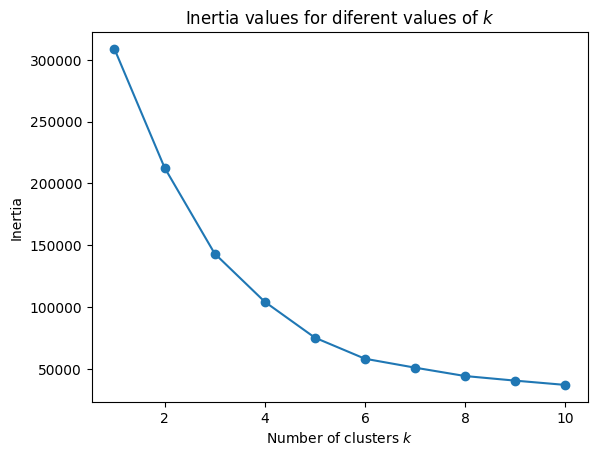

In [15]:
plt.figure()
plt.plot(range(1, 11), inertia_values, "o-")
plt.title("Inertia values for diferent values of $ k $")
plt.xlabel("Number of clusters $ k $")
plt.ylabel("Inertia")
plt.show()

We'll choose the value of $ k $ clusters which if we add another cluster it doesn't result in a relevant improvement. In our case, the value of **6** clusters satisfy this condition.

#### Average Solhouette Method

The Silhouette method provides a succint graphical representation of how well each observation has been classified.

The silhouette coefficient is defined as:
$$
s = \frac{b - a}{max(a, b)}
$$
where $ a $ is the means distance between a sample and all other observations in the same class, and $ b $ is the mean distance between a sample and all other observations in the next nearest cluster. The silhouette coefficient is a measure of how similar an observation is to its own cluster compared to other clusters. It ranges from -1 to +1, where a high values indicates that the observation is well matched to its own cluster and poorly matched to neighboring clusters.

Our approach will be simple: we'll compute the average silhouette coefficient of several clustering strategies using different $ k $ values. Gennerally speaking, if we obtain a high average value it means that we have good clustering.

In [16]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

The sklearn's [silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#) function computes the silhouette coefficients for for each data sample and its assigned cluster centroid. [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) returns the average sillhouette coefficient for a clustering given the data and it's assigned cluster centroids.

In [17]:
import matplotlib

def plot_silhouettes(c_model, data, c_labels, ax=None):
    n_clusters = len(c_model.cluster_centers_)
    
    samples_coeffs = silhouette_samples(data, c_labels)
    
    cmap = matplotlib.colormaps["Spectral"]
    
    ax = plt.gca() if ax is None else ax
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_coeffs = samples_coeffs[c_labels == i]
        ith_cluster_coeffs.sort()
        
        size_cluster_i = ith_cluster_coeffs.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cmap(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
    
    silhouette_avg = silhouette_score(data, c_labels)
    
    ax.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax.set_xlabel(f"Silhouette coefficient values (Avg = {silhouette_avg:3.2f})")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    return silhouette_avg

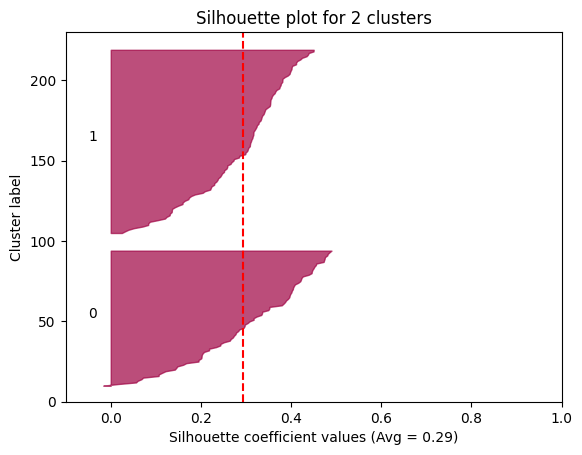

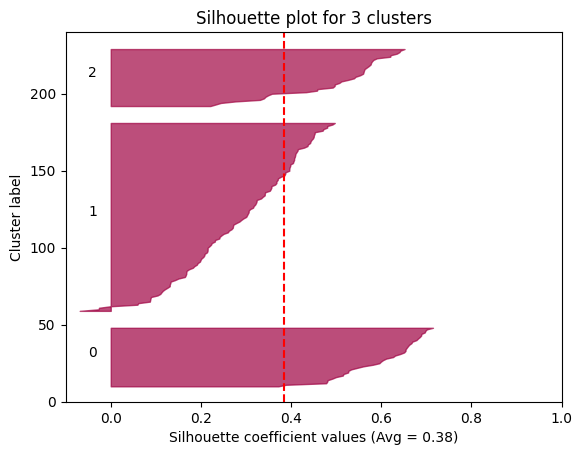

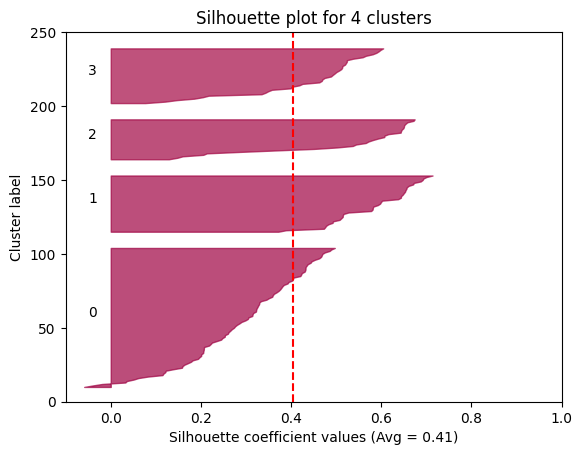

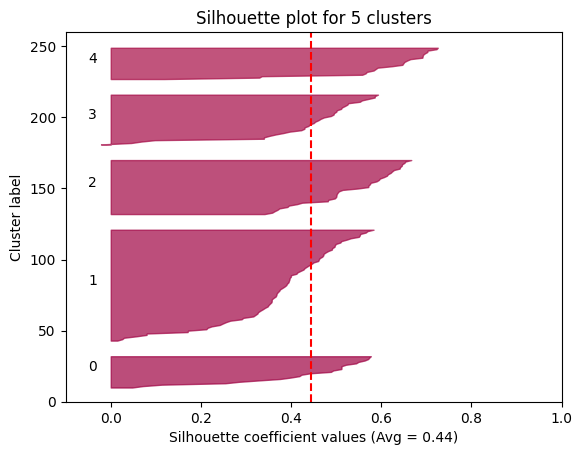

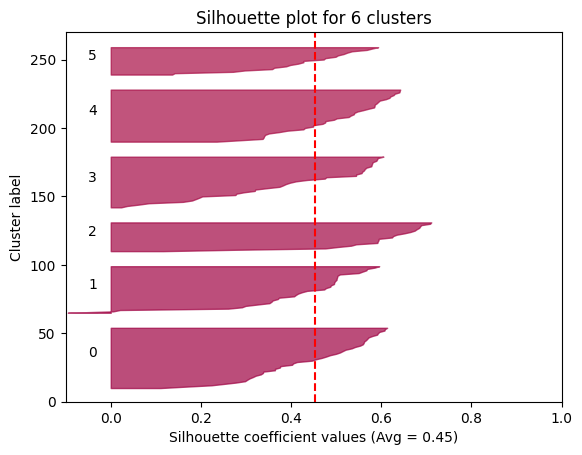

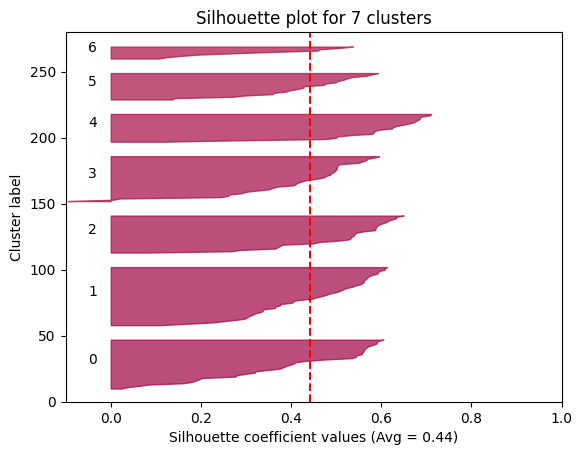

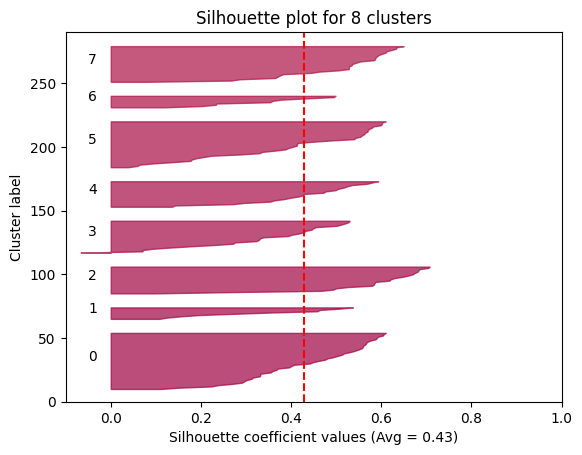

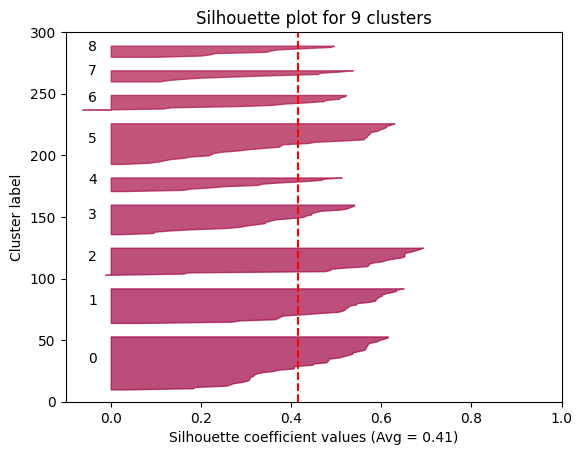

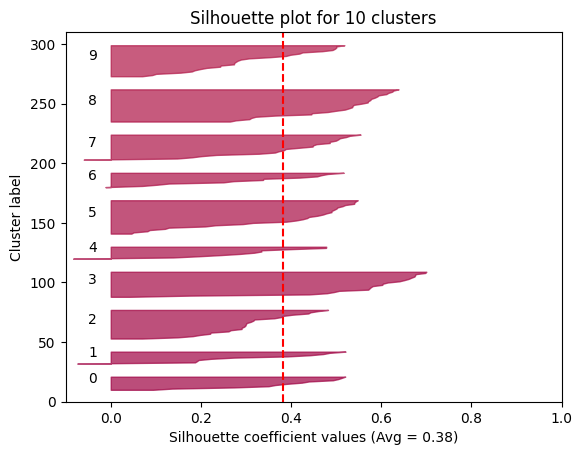

In [18]:
silhouette_avgs = []

for k in range(2, 11):
    kmeans = KMeans(
        n_clusters=k,
        max_iter=100,
        algorithm="lloyd",
        n_init=100,
        random_state=42
    ).fit(customer_data)
    cluster_labels = kmeans.predict(customer_data)
    
    _, ax = plt.subplots()
    si = plot_silhouettes(kmeans, customer_data,
                         c_labels=cluster_labels, ax=ax)
    silhouette_avgs.append(si)

silhouette_avgs = np.array(silhouette_avgs)

Now we can visualize the optimal cluster

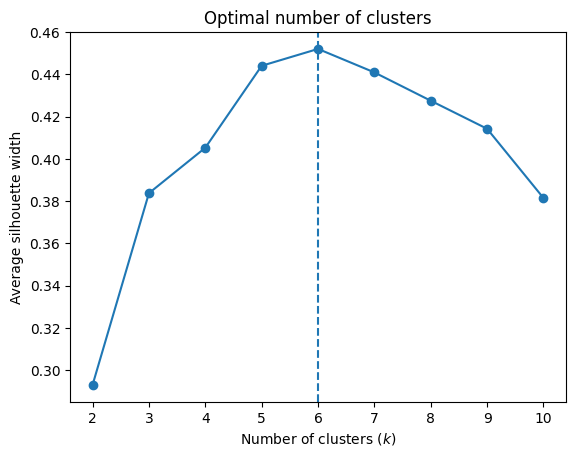

In [19]:
_, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_avgs, "o-")
ax.axvline(x=silhouette_avgs.argmax() + 2, linestyle="--")
ax.set_title("Optimal number of clusters")
ax.set_xlabel("Number of clusters ($ k $)")
ax.set_ylabel("Average silhouette width")
plt.show()

As we can see, the silhouette plot confirms that the optimal number of clusters is **6**.

### Clustering Visualization

As the dataset is composed of 4 variables, it is impossible for us to visulize the clustering in such space. So we need a way to visualize this data in a **reduced space**. For this, we'll used the so called **Principal Component Analysis** (**PCA**), a statistical technique that decompose a multivariate dataset in a set of **principal components**: successive orthogonal components that explain a maximun amount of the variance. The first principal component can be defined as a direction of maximun variance of the projected data, while the second component can be defined as a direction of the second maximun variance of the projected data, the third component is the direction of the third maximun variance, and so on.

First, we compute the optimal clustering.

In [20]:
n_clusters = 6
optimal_model = KMeans(
    n_clusters=n_clusters, max_iter=100, algorithm="lloyd", n_init=100, random_state=42
).fit(customer_data)
cluster_labels = optimal_model.predict(customer_data)

Next we fit a [sklearn's PCA transformer](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and project the data to this reduced space.

In [21]:
from sklearn.decomposition import PCA

# We'll use only two princiapl Components
pc_reduced = PCA(n_components=2, random_state=42).fit(customer_data)

reduced_data = pc_reduced.transform(customer_data)
reduced_data.shape

(200, 2)

The 4D variable space was transformed to a 2D space, which we can use to visualize the clustering results.

/tmp/ipykernel_53436/2543292152.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral", n_clusters)


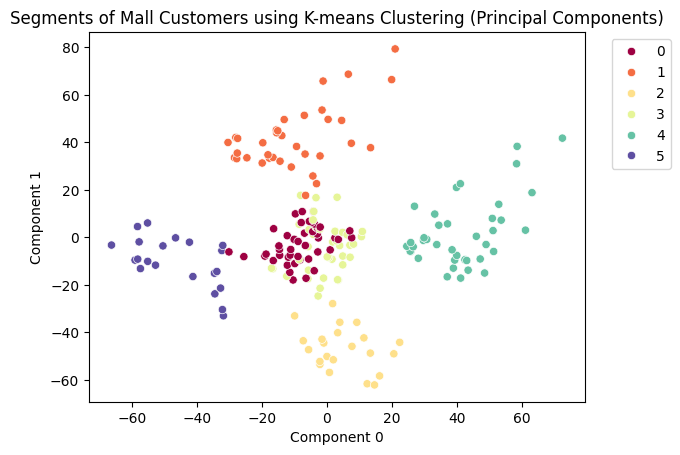

In [22]:
cmap = cm.get_cmap("Spectral", n_clusters)

ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                     hue=cluster_labels, palette=cmap)
ax.set_title("Segments of Mall Customers using K-means Clustering (Principal Components)")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

As we can see, clusters 0, 1, 2 and 4 are well defined and clusters 3 and 5 are a bit mixed.

## Visualizing variables with high variation

Although the above plot can show clearly the effect of the clustering, we cannot actually extract an useful information from it. It would be better to see the clustering results using a subset of the original components, but how do we do it?

Let's fit another PCA transformer, but this time we'll compute components for the full 4D space.

In [23]:
# When we not supply n_components, the pricipal components are computed
# for the full feature space.
pc_full = PCA(random_state=42).fit(customer_data)

The PCA transformer computes the components and stores them in the `components_` attribute, sorted by the amount of variation. The amounts of variation of the components are stored in the `explained_variance_` attribute.

In [24]:
pc_full.explained_variance_

array([7.00264432e+02, 6.84331841e+02, 1.67228881e+02, 2.45498578e-01])

Why have we did this? The `explained_variance_` attribute now contains the amount of variation of each variable of the dataset. The amount of variation can be interpreted as a measure of *how much information* is contained in data. High variation means more information. So, now we can tell which dataset's variables can better explain the information in data.

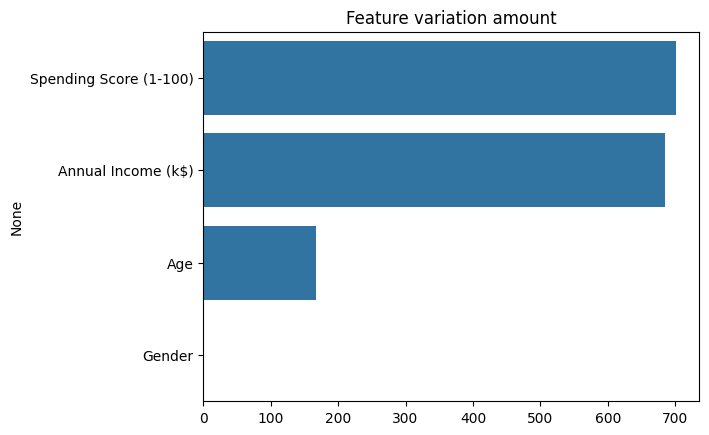

In [25]:
com_order = pc_full.explained_variance_.argsort()
var_sorted_columns = customer_data.columns[com_order]
var_sorted_columns

ax = sns.barplot(y=var_sorted_columns, x=pc_full.explained_variance_)
plt.title("Feature variation amount");

As we can see, "Spending Score (1-100)" and "Annual Income (k$)" are the variables that holds most of the information in dataset. We can visualize the clustering results using only those variables.

/tmp/ipykernel_53436/930194893.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral", n_clusters)


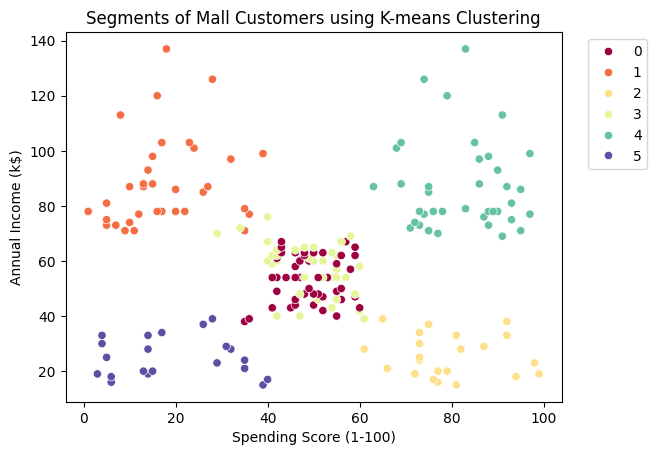

In [26]:
cmap = cm.get_cmap("Spectral", n_clusters)

ax = sns.scatterplot(x=var_sorted_columns[0], y=var_sorted_columns[1], data=customer_data,
                     hue=cluster_labels, palette=cmap)
ax.set_title("Segments of Mall Customers using K-means Clustering")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

Analysing the plot, we can clearly conclude that the clustering methodology successfully isolated 4 groups:
- **Group 0**: represents customers with low Spending Scores and low Annual Incomes
- **Group 1**: represents customers with high Spending Scores and low Annual Incomes
- **Group 4**: represents customers with high Spending Scores and high Annual Incomes
- **Group 2**: represents customers with low Spending Scores and high Annual Incomes

Groups **3** and **5** represents customers with both medium Spending Scores and medium Annual Incomes. These groups seems to be mixed in this reduced space, but remember that we took only the two  most informative features in consideration.

# Conclusion

Modern business strive by delivering higly personalized services to their customers, which would not have been possible without some form of customer categorization or segmentation. In doing so, organizations can easily struture their services and products around their customers while targeting them to drive more revenue.

In this post we presented a simple approach to Customer Segmentation using the k-means algorithm. The clustering is based on user features, like age, gender, income and purchase history. Although we used the classic clustering methodology, many other techniques, like hierarchical clustering, Fuzzy clustering or Density-based clustering could be suitable here.

# References

Most of the methodology present in this post was adapted from Data Flair's [post](https://data-flair.training/blogs/data-science-projects-code/). Thanks to Data Falir's team for sharing their knowledge.

The notebook of this post can found [here](https://github.com/TheCamilovisk/DSNotebooks/blob/main/CustomerSegmentation/CustomerSegmentation.ipynb).

Other useful links:
- Irfan Alghani Khalid's post on [Customer Segmentation in Python](https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945)
- GeeksforGeeks's post on [Elbow Method for optimal value of k in KMeans](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)
- Sklearn's [page](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on Selecting the number of clusters with silhouette analysis on KMeans clustering
- Sklearn's [page](https://scikit-learn.org/stable/modules/clustering.html) on clustering
- [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) by Trevor Hastie, Robert Tibshirani and Jerome Friedman

Thanks for reading to the end, and stay tuned for new posts.